In [ ]:
import numpy as np
import pandas as pd
import matplotlib

In [ ]:
df=pd.read_csv("/content/fact_TS_iPASS.csv")
df1=pd.read_csv("/content/fact_stamps.csv")
df2=pd.read_csv("/content/fact_transport.csv")

In [ ]:
try:
    df['month'] = pd.to_datetime(df['month'], errors='coerce')
except ValueError:
  pass



8->List down the top 5 sectors that have witnessed the most significant investments in FY 2022

In [ ]:
# Assuming that 'month' contains date objects, you can extract the fiscal year
df['fiscal_year'] = df['month'].dt.year

# Filter data for FY 2022
fy_2022_data = df[df['fiscal_year'] == 2022]

# Group by sector and sum the investments
sector_investments = fy_2022_data.groupby('sector')['investment in cr'].sum()

# Sort the sectors by investment in descending order and get the top 5
top_5_sectors = sector_investments.nlargest(5)

# Print the top 5 sectors
print(top_5_sectors)


sector
Real Estate,Industrial Parks and IT Buildings    3990.2522
Plastic and Rubber                               3699.1197
Pharmaceuticals and Chemicals                    2649.1294
Solar and Other Renewable Energy                 2201.5980
Beverages                                        1848.1920
Name: investment in cr, dtype: float64


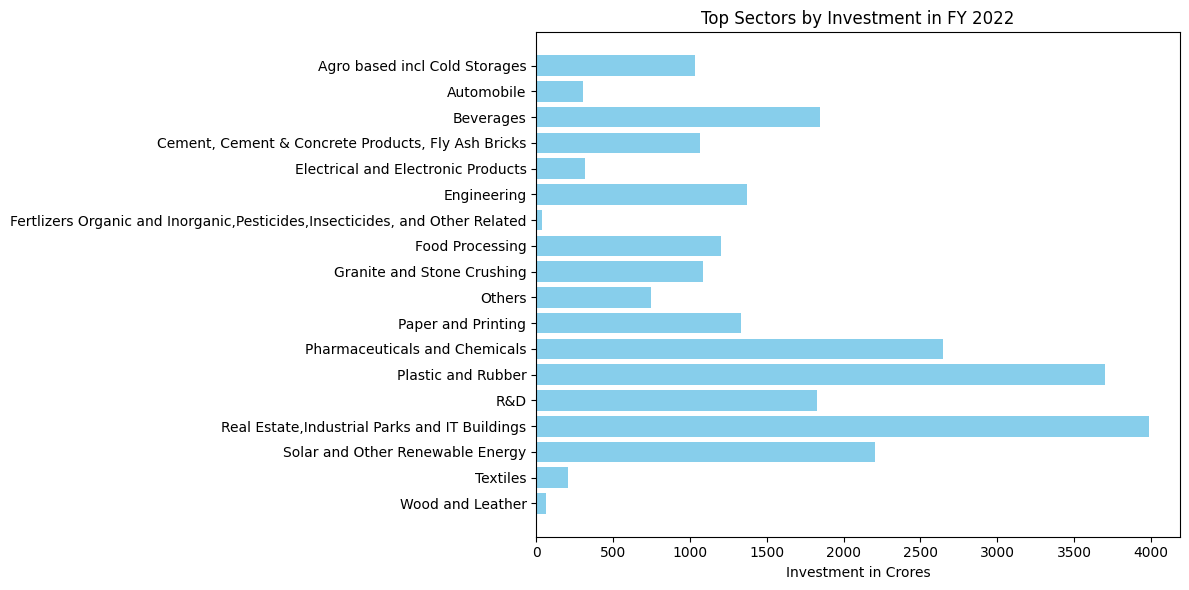

In [ ]:
import matplotlib.pyplot as plt

# Data
sectors = [
    "Agro based incl Cold Storages",
    "Automobile",
    "Beverages",
    "Cement, Cement & Concrete Products, Fly Ash Bricks",
    "Electrical and Electronic Products",
    "Engineering",
    "Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related",
    "Food Processing",
    "Granite and Stone Crushing",
    "Others",
    "Paper and Printing",
    "Pharmaceuticals and Chemicals",
    "Plastic and Rubber",
    "R&D",
    "Real Estate,Industrial Parks and IT Buildings",
    "Solar and Other Renewable Energy",
    "Textiles",
    "Wood and Leather"
]

investments = [
    1033.2048,
    305.8881,
    1848.1920,
    1066.1876,
    318.9721,
    1372.8952,
    34.6753,
    1203.0973,
    1087.1733,
    748.7189,
    1330.8713,
    2649.1294,
    3699.1197,
    1829.7275,
    3990.2522,
    2201.5980,
    205.1928,
    63.3668
]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(sectors, investments, color='skyblue')
plt.xlabel('Investment in Crores')
plt.title('Top Sectors by Investment in FY 2022')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest investment at the top
plt.tight_layout()

# Display the chart
plt.show()


9. List down the top 3 districts that have attracted the most significant sector investments during FY 2019 to 2022? What factors could have led to the substantial investments in these particular districts?

In [ ]:
# Extract the fiscal year from the 'month' column
df['fiscal_year'] = df['month'].dt.year

# Filter data for FY 2019 to 2022
filtered_df = df[df['fiscal_year'].between(2019, 2022)]

# Group by district and sector, summing up the investments
district_sector_investments = filtered_df.groupby(['dist_code', 'sector'])['investment in cr'].sum().reset_index()

# Find the top 3 districts with the highest total investments
top_districts = district_sector_investments.groupby('dist_code')['investment in cr'].sum()#.nlargest(3)

# Print the result
print("Top 3 districts with the most significant sector investments:")
for district, total_investment in top_districts.iteritems():
    print(f"District {district}: Total Investment - {total_investment} crores")


Top 3 districts with the most significant sector investments:
District 14_1: Total Investment - 4498.7658 crores
District 14_2: Total Investment - 136.1806 crores
District 14_3: Total Investment - 345.9652 crores
District 14_4: Total Investment - 550.7299 crores
District 14_5: Total Investment - 1528.433 crores
District 15_1: Total Investment - 40984.2759 crores
District 15_2: Total Investment - 9987.2529 crores
District 15_3: Total Investment - 244.1957 crores
District 16_1: Total Investment - 54.2656 crores
District 17_1: Total Investment - 3038.2521 crores
District 17_2: Total Investment - 8955.4081 crores
District 17_3: Total Investment - 1796.6458000000002 crores
District 18_1: Total Investment - 194.709 crores
District 18_2: Total Investment - 1930.1955999999998 crores
District 19_1: Total Investment - 39.7487 crores
District 19_2: Total Investment - 90.9713 crores
District 19_3: Total Investment - 382.8737 crores
District 19_4: Total Investment - 96.03710000000001 crores
Distric

<ipython-input-12-35d0b811f538>:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for district, total_investment in top_districts.iteritems():


Top three districts

In [ ]:
top_districts = district_sector_investments.groupby('dist_code')['investment in cr'].sum().nlargest(3)

# Print the result
print("Top 3 districts with the most significant sector investments:")
for district, total_investment in top_districts.iteritems():
    print(f"District  {district} : Total Investment -  {total_investment}  crores")

Top 3 districts with the most significant sector investments:
District  15_1 : Total Investment -  40984.2759  crores
District  15_2 : Total Investment -  9987.2529  crores
District  17_2 : Total Investment -  8955.4081  crores


<ipython-input-13-9256a32a1564>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for district, total_investment in top_districts.iteritems():


10. Is there any relationship between district investments, vehiclessales and stamps revenue within the same district between FY 2021 and 2022

In [ ]:
import pandas as pd

dat = {
    'dist_code': ['14_1', '14_2', '14_3', '14_4', '14_5', '15_1', '15_2', '15_3', '16_1', '17_1', '17_2', '17_3', '18_1', '18_2', '19_1', '19_2', '19_3', '19_4', '20_1', '20_2', '20_3', '20_4', '21_1', '21_2', '21_3', '21_5', '21_6', '21_7', '22_1', '22_2', '23_1', '23_2', '23_3'],
    'invest_cr': [2030.8849, 112.2565, 312.9116, 396.8709, 1517.738, 13926.9518, 5428.4012, 154.8307, 34.81, 1991.7268, 6004.477, 1321.7153, 127.6958, 1082.7326, 10.852, 55.8194, 192.6367, 20.1392, 264.1866, 91.0616, 84.1892, 90.516, 183.8165, 127.0157, 100.9638, 113.8661, 26.2693, 18.7916, 366.899, 1031.04, 1401.4812, 1414.6884, 1814.9654],
    'e_stamps': [899612434, 272076616, 378375339, 306488316, 205291521, 32332939769, 18747892104, 387426499, 10893677949, 482267731, 6522436259, 746741914, 1165209994, 380467770, 332597037, 293878065, 444256231, 58294715, 1078423581, 443715297, 294316478, 508023769, 2112813388, 173457579, 261658853, 264393331, 148856779, 0, 1644624288, 254379427, 1221278894, 792850936, 1616599565]
}

df09 = pd.DataFrame(dat)



In [ ]:
# Assuming df is your DataFrame with columns 'dist_code', 'invest_cr', 'e_stamps'
correlation_invest_stamps = df09['invest_cr'].corr(df09['e_stamps'])

# Print the correlation coefficient
print(f"Correlation between investment and stamp revenue: {correlation_invest_stamps}")

# You can repeat the process for other pairs of variables, e.g., 'invest_cr' and 'vehiclesales'
# correlation_invest_vehiclesales = df['invest_cr'].corr(df['vehiclesales'])
# print(f"Correlation between investment and vehicle sales: {correlation_invest_vehiclesales}")


Correlation between investment and stamp revenue: 0.8906751823093101


11->Are there any particular sectors that have shown substantial investment in multiple districts between FY 2021 and 2022?


In [ ]:
data = [
    1033.2048, 305.8881, 1848.1920, 1066.1876, 318.9721, 1372.8952,
    34.6753, 1203.0973, 1087.1733, 748.7189, 1330.8713, 2649.1294,
    3699.1197, 1829.7275, 3990.2522, 2201.5980, 205.1928, 63.3668
]

# Calculate the average
treshholdvalue = sum(data) / len(data)

# Display the result
print("Average:", treshholdvalue)


Average: 1388.2367944444445


In [ ]:
# Assuming that 'month' contains date objects, extract the fiscal year
df['fiscal_year'] = df['month'].dt.year

# Filter data for FY 2021 and FY 2022
fy_2021_2022_data = df[df['fiscal_year'].isin([2021, 2022])]

# Group by sector and count the number of districts with substantial investment
sector_district_counts = fy_2021_2022_data.groupby(['sector', 'dist_code']).size().reset_index(name='investment_count')

# Filter sectors with substantial investment in multiple districts
substantial_investment_sectors = sector_district_counts[sector_district_counts['investment_count'] > 1]['sector'].unique()

# Print the sectors with substantial investment in multiple districts
print("Sectors with substantial investment in multiple districts between FY 2021 and 2022:")
for sector in substantial_investment_sectors:
    print(sector)


Sectors with substantial investment in multiple districts between FY 2021 and 2022:
Agro based incl Cold Storages
Automobile
Beverages
Cement, Cement & Concrete Products, Fly Ash Bricks
Electrical and Electronic Products
Engineering
Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related
Food Processing
Granite and Stone Crushing
Others
Paper and Printing
Pharmaceuticals and Chemicals
Plastic and Rubber
R&D
Real Estate,Industrial Parks and IT Buildings
Solar and Other Renewable Energy
Textiles
Wood and Leather


In [ ]:
start_date_2021 = pd.to_datetime('2021-04-01')
end_date_2022 = pd.to_datetime('2022-03-31')

investment_fy_2021_2022 = df[(df['month'] >= start_date_2021) & (df['month'] <= end_date_2022)]

# Group by sector and calculate total investment across all districts
sector_total_investment = investment_fy_2021_2022.groupby('sector')['investment in cr'].sum()

# Identify sectors with substantial investment in multiple districts
substantial_investment_sectors = sector_total_investment[sector_total_investment >treshholdvalue]

# Display the identified sectors
print(substantial_investment_sectors)

sector
Beverages                                        1848.1920
Pharmaceuticals and Chemicals                    2649.1294
Plastic and Rubber                               3699.1197
R&D                                              1829.7275
Real Estate,Industrial Parks and IT Buildings    3990.2522
Solar and Other Renewable Energy                 2201.5980
Name: investment in cr, dtype: float64


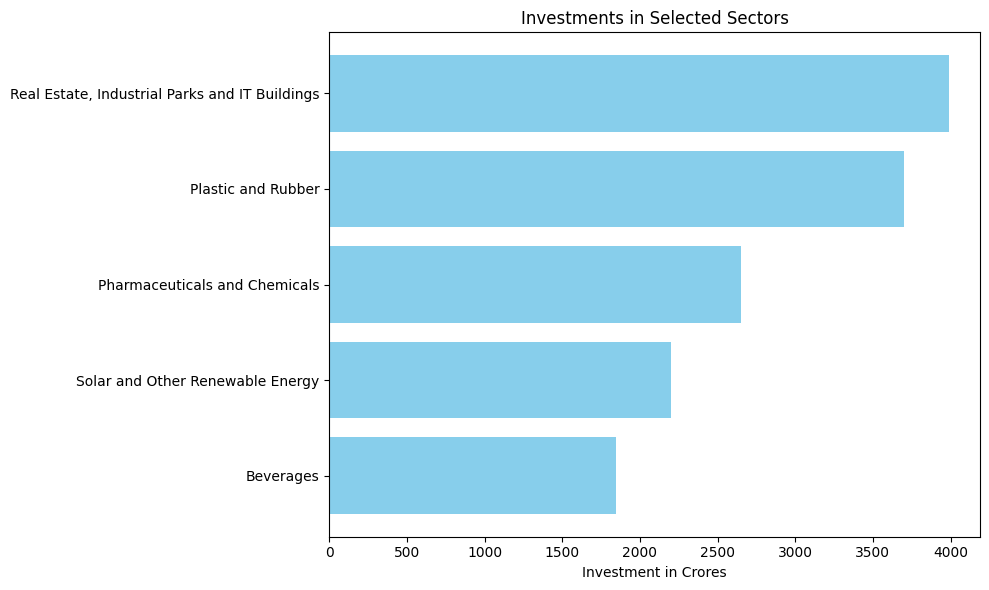

In [ ]:
import matplotlib.pyplot as plt

# Data
sectors = [
    "Real Estate, Industrial Parks and IT Buildings",
    "Plastic and Rubber",
    "Pharmaceuticals and Chemicals",
    "Solar and Other Renewable Energy",
    "Beverages"
]

investments = [
    3990.2522,
    3699.1197,
    2649.1294,
    2201.5980,
    1848.1920
]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(sectors, investments, color='skyblue')
plt.xlabel('Investment in Crores')
plt.title('Investments in Selected Sectors')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest investment at the top
plt.tight_layout()

# Display the chart
plt.show()


12. Can we identify any seasonal patterns or cyclicality in the investment trends for specific sectors? Do certain sectors experience higher investments during particular months?


<Figure size 1200x600 with 0 Axes>

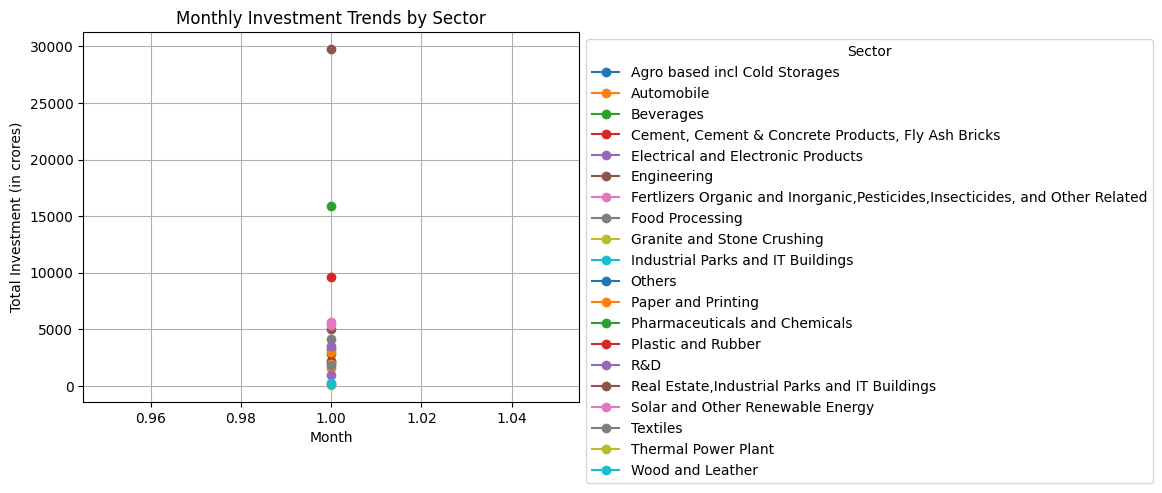

In [ ]:
# Group by sector and month, calculate total investment
sector_monthly_investment = df.groupby(['sector', df['month'].dt.month])['investment in cr'].sum()

# Pivot the table for better visualization
sector_monthly_investment = sector_monthly_investment.unstack(level=0)

# Plotting the trends for each sector
plt.figure(figsize=(12, 6))
sector_monthly_investment.plot(marker='o')
plt.xlabel('Month')
plt.ylabel('Total Investment (in crores)')
plt.title('Monthly Investment Trends by Sector')
plt.legend(title='Sector', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


In [ ]:
"""incomplete
merged_df = pd.merge(investment_df, vehicle_sales_df, on=['dist_code', 'month'])
merged_df = pd.merge(merged_df, stamp_revenue_df, on=['dist_code', 'month'])

# Display the merged dataframe
print(merged_df)

# Calculate the correlation matrix
correlation_matrix = merged_df[['investment in cr', 'total_vehicle_sales', 'stamp_revenue']].corr()

# Display the correlation matrix
print(correlation_matrix)"""


"incomplete\nmerged_df = pd.merge(investment_df, vehicle_sales_df, on=['dist_code', 'month'])\nmerged_df = pd.merge(merged_df, stamp_revenue_df, on=['dist_code', 'month'])\n\n# Display the merged dataframe\nprint(merged_df)\n\n# Calculate the correlation matrix\ncorrelation_matrix = merged_df[['investment in cr', 'total_vehicle_sales', 'stamp_revenue']].corr()\n\n# Display the correlation matrix\nprint(correlation_matrix)"